<a href="https://colab.research.google.com/github/kavansingh582/CSCI164/blob/main/Photo_Captioning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1b47sxG6Z7W8JiubMKSN38W30cbRzbTAN
To: /content/image1.jpg
100% 1.80M/1.80M [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=17MwA0uk4T8k9-z3fC43Qvibmxv5-EwNK
To: /content/image2.jpg
100% 3.74M/3.74M [00:00<00:00, 191MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K-UIDdqQE62hFYe9HQWNWaHG1K30tJ7K
To: /content/image3.jpg
100% 3.94M/3.94M [00:00<00:00, 44.9MB/s]


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]


Results for image1.jpg:


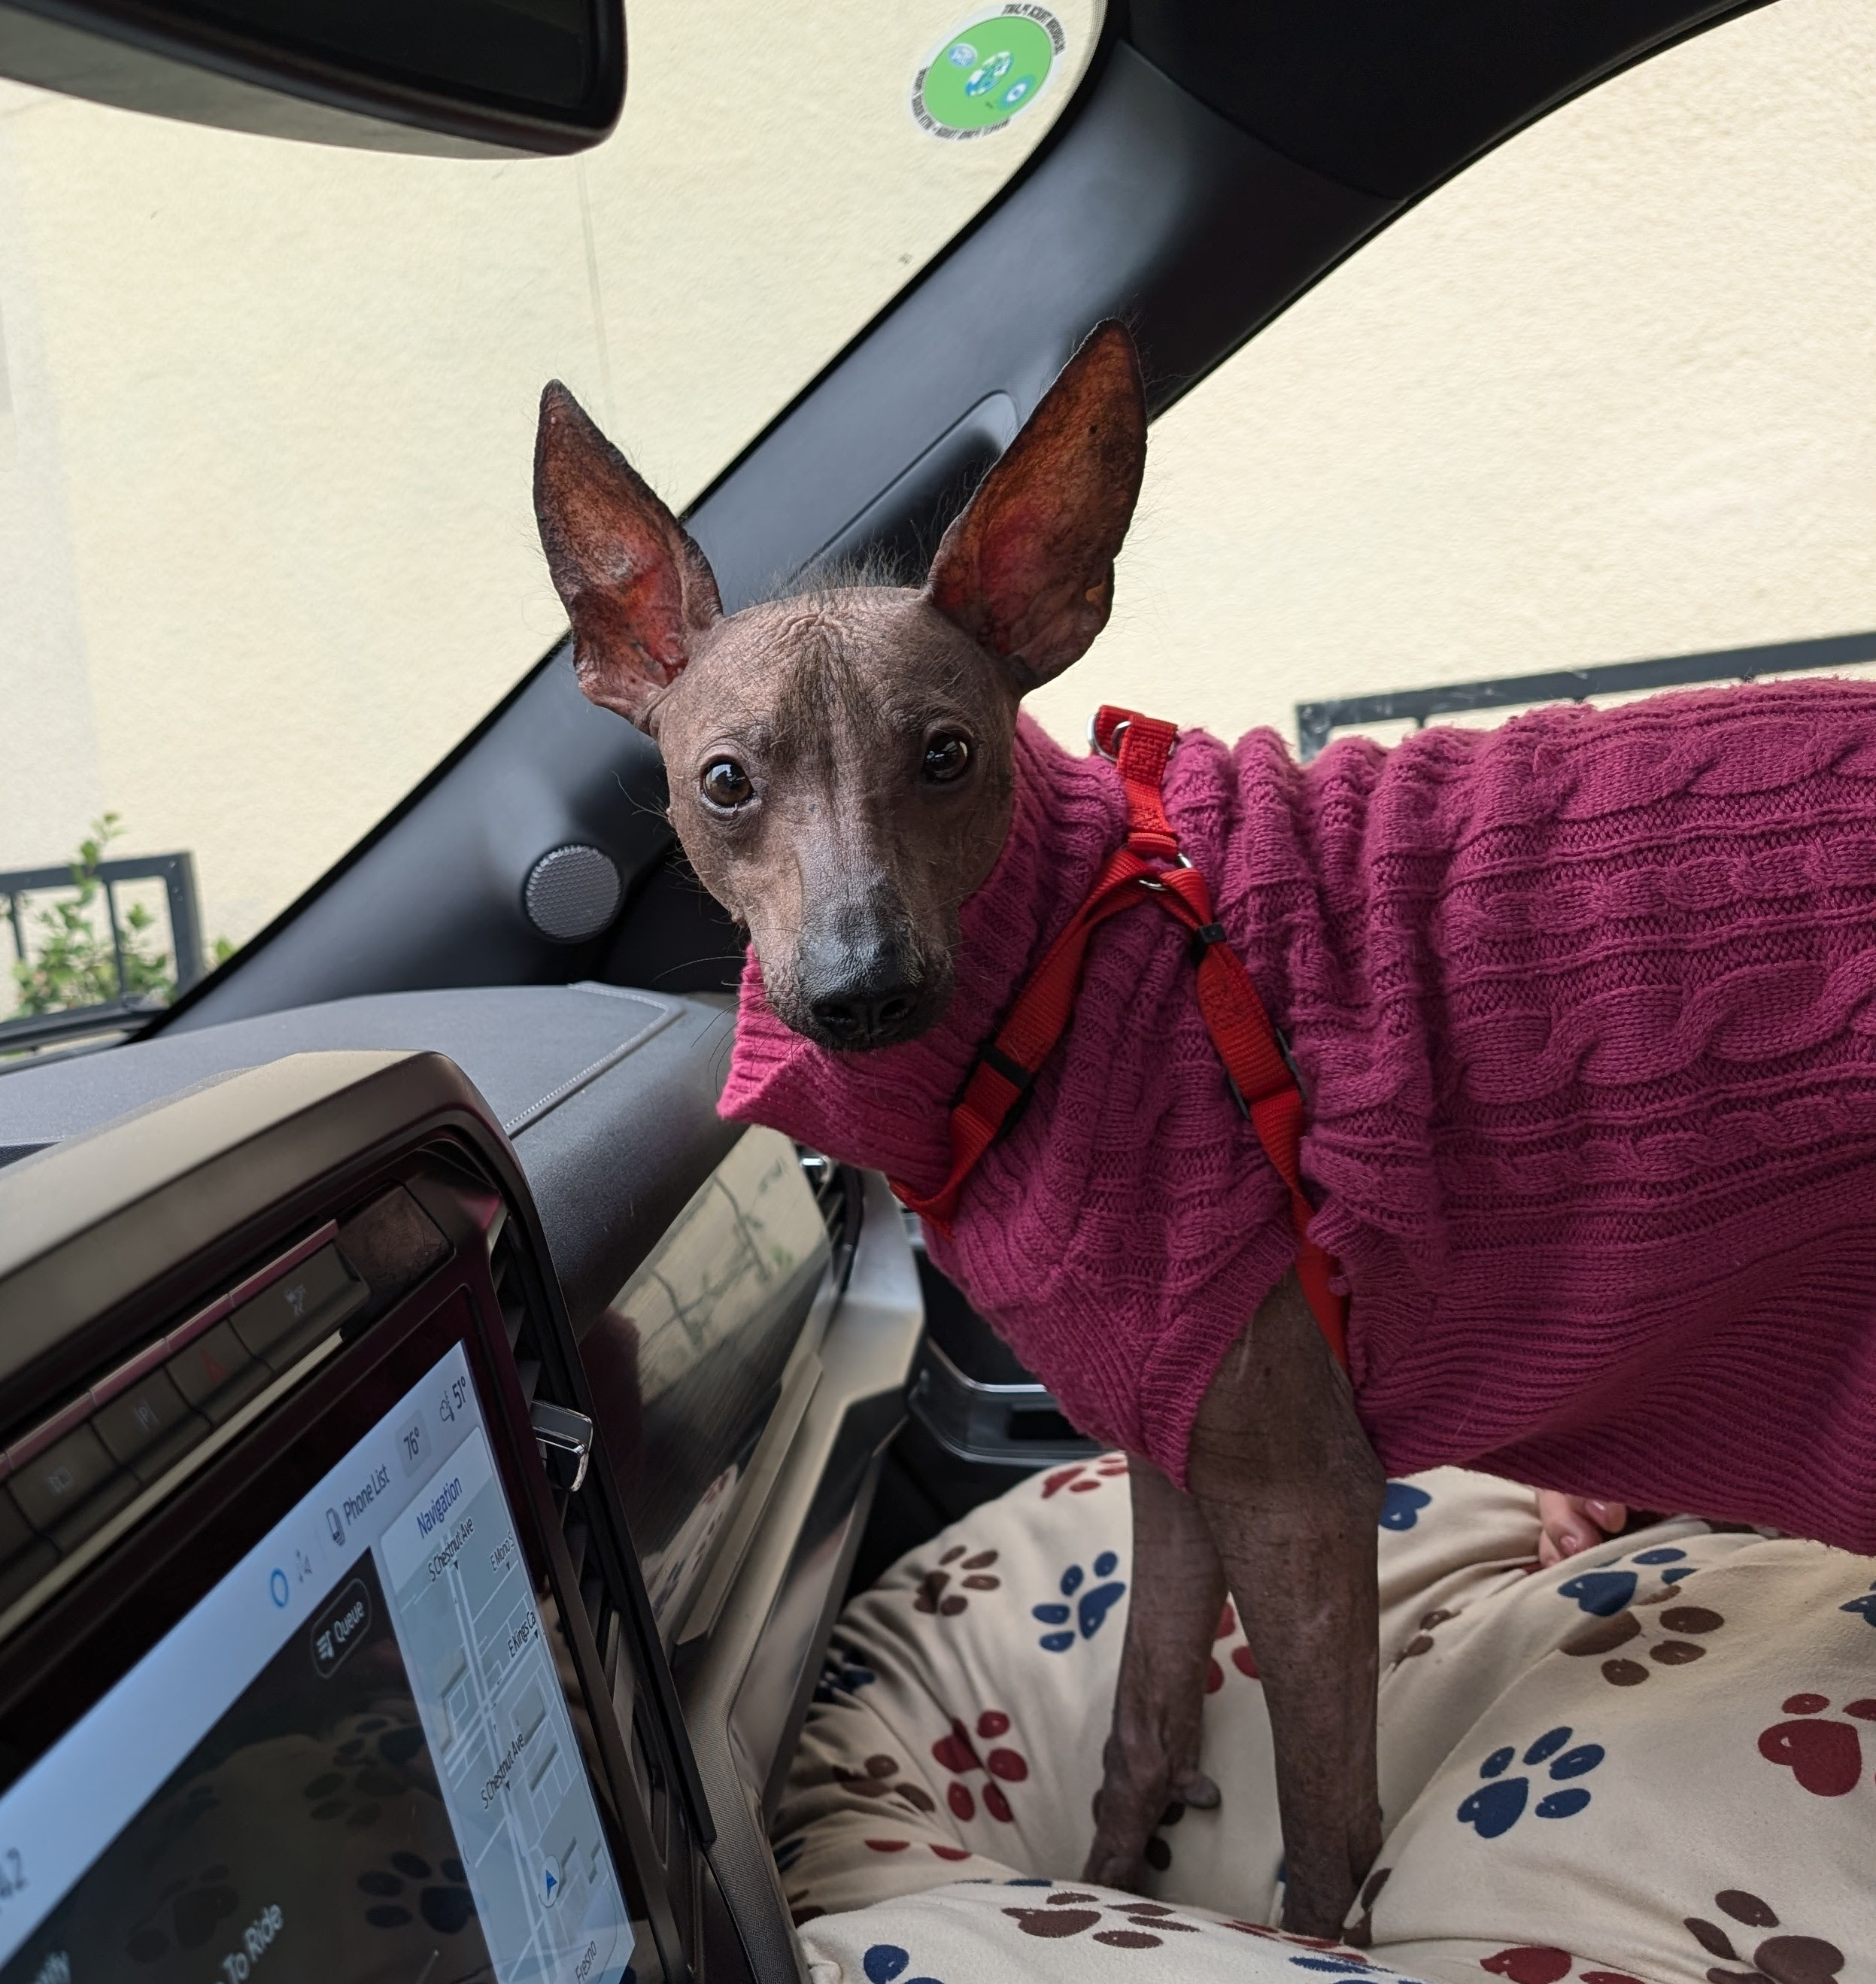

Vit-GPT2: a small dog is sitting in a car seat 


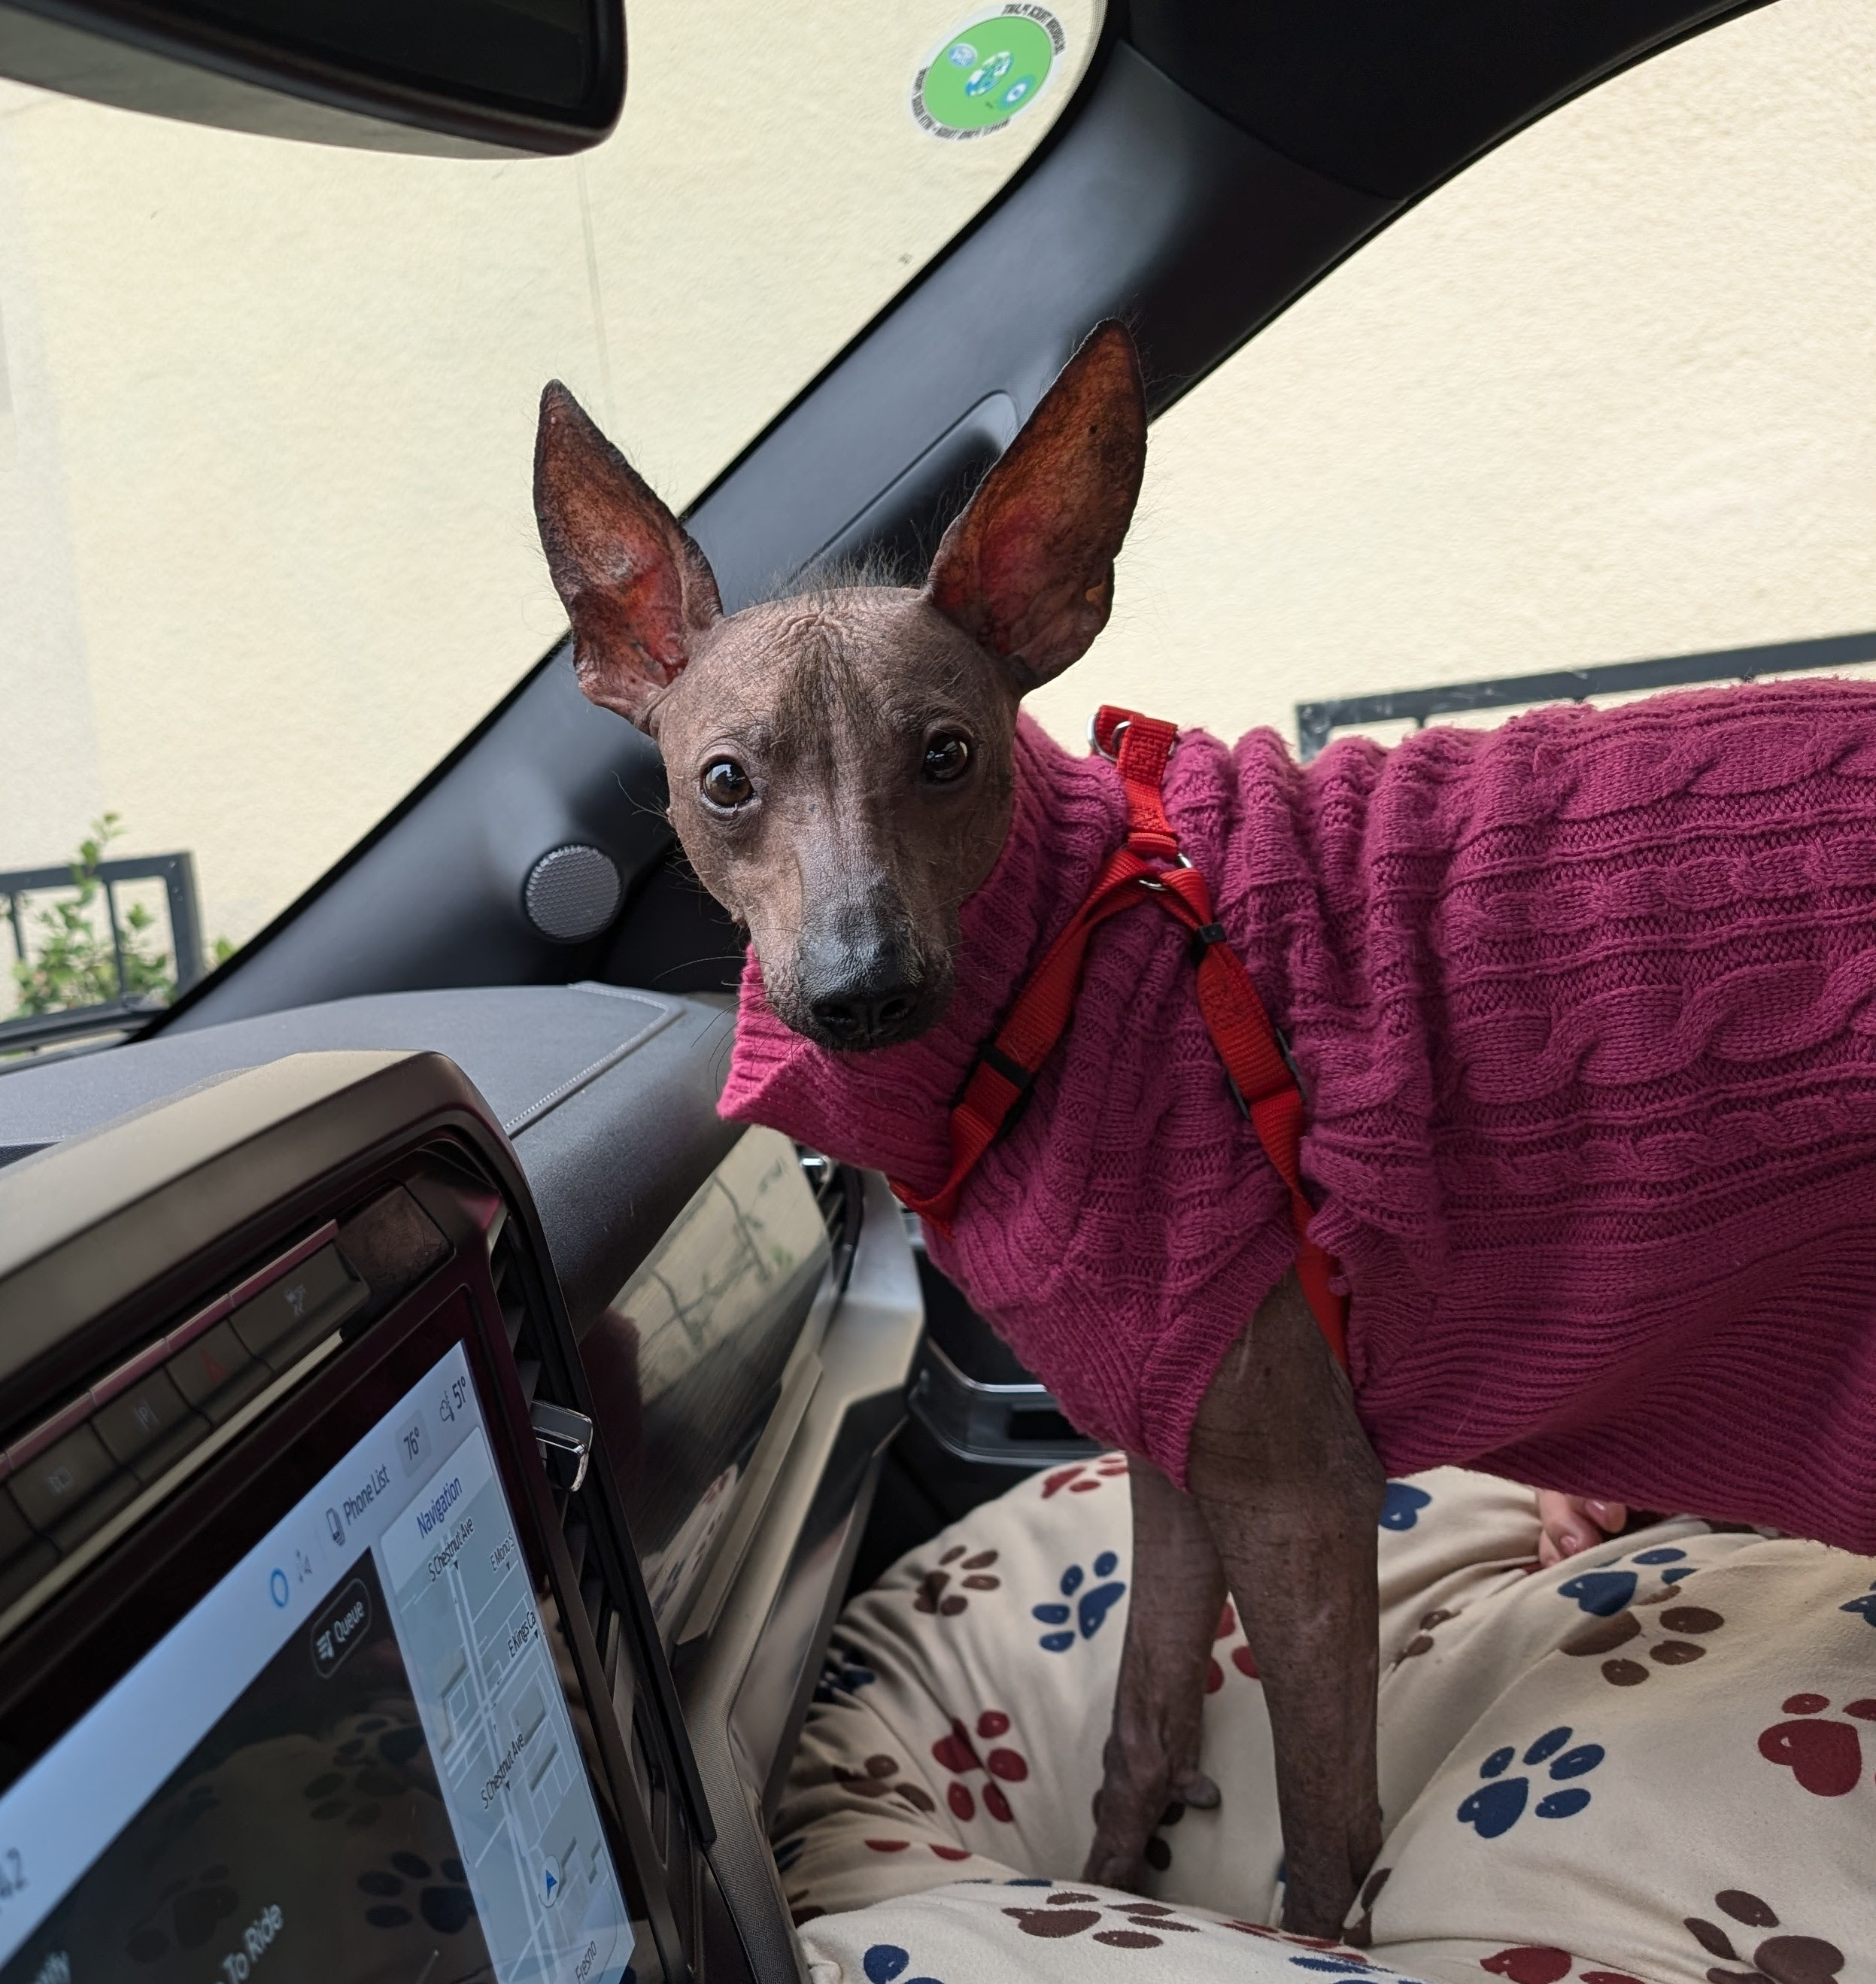

BLIP: a small dog wearing a sweater in a car


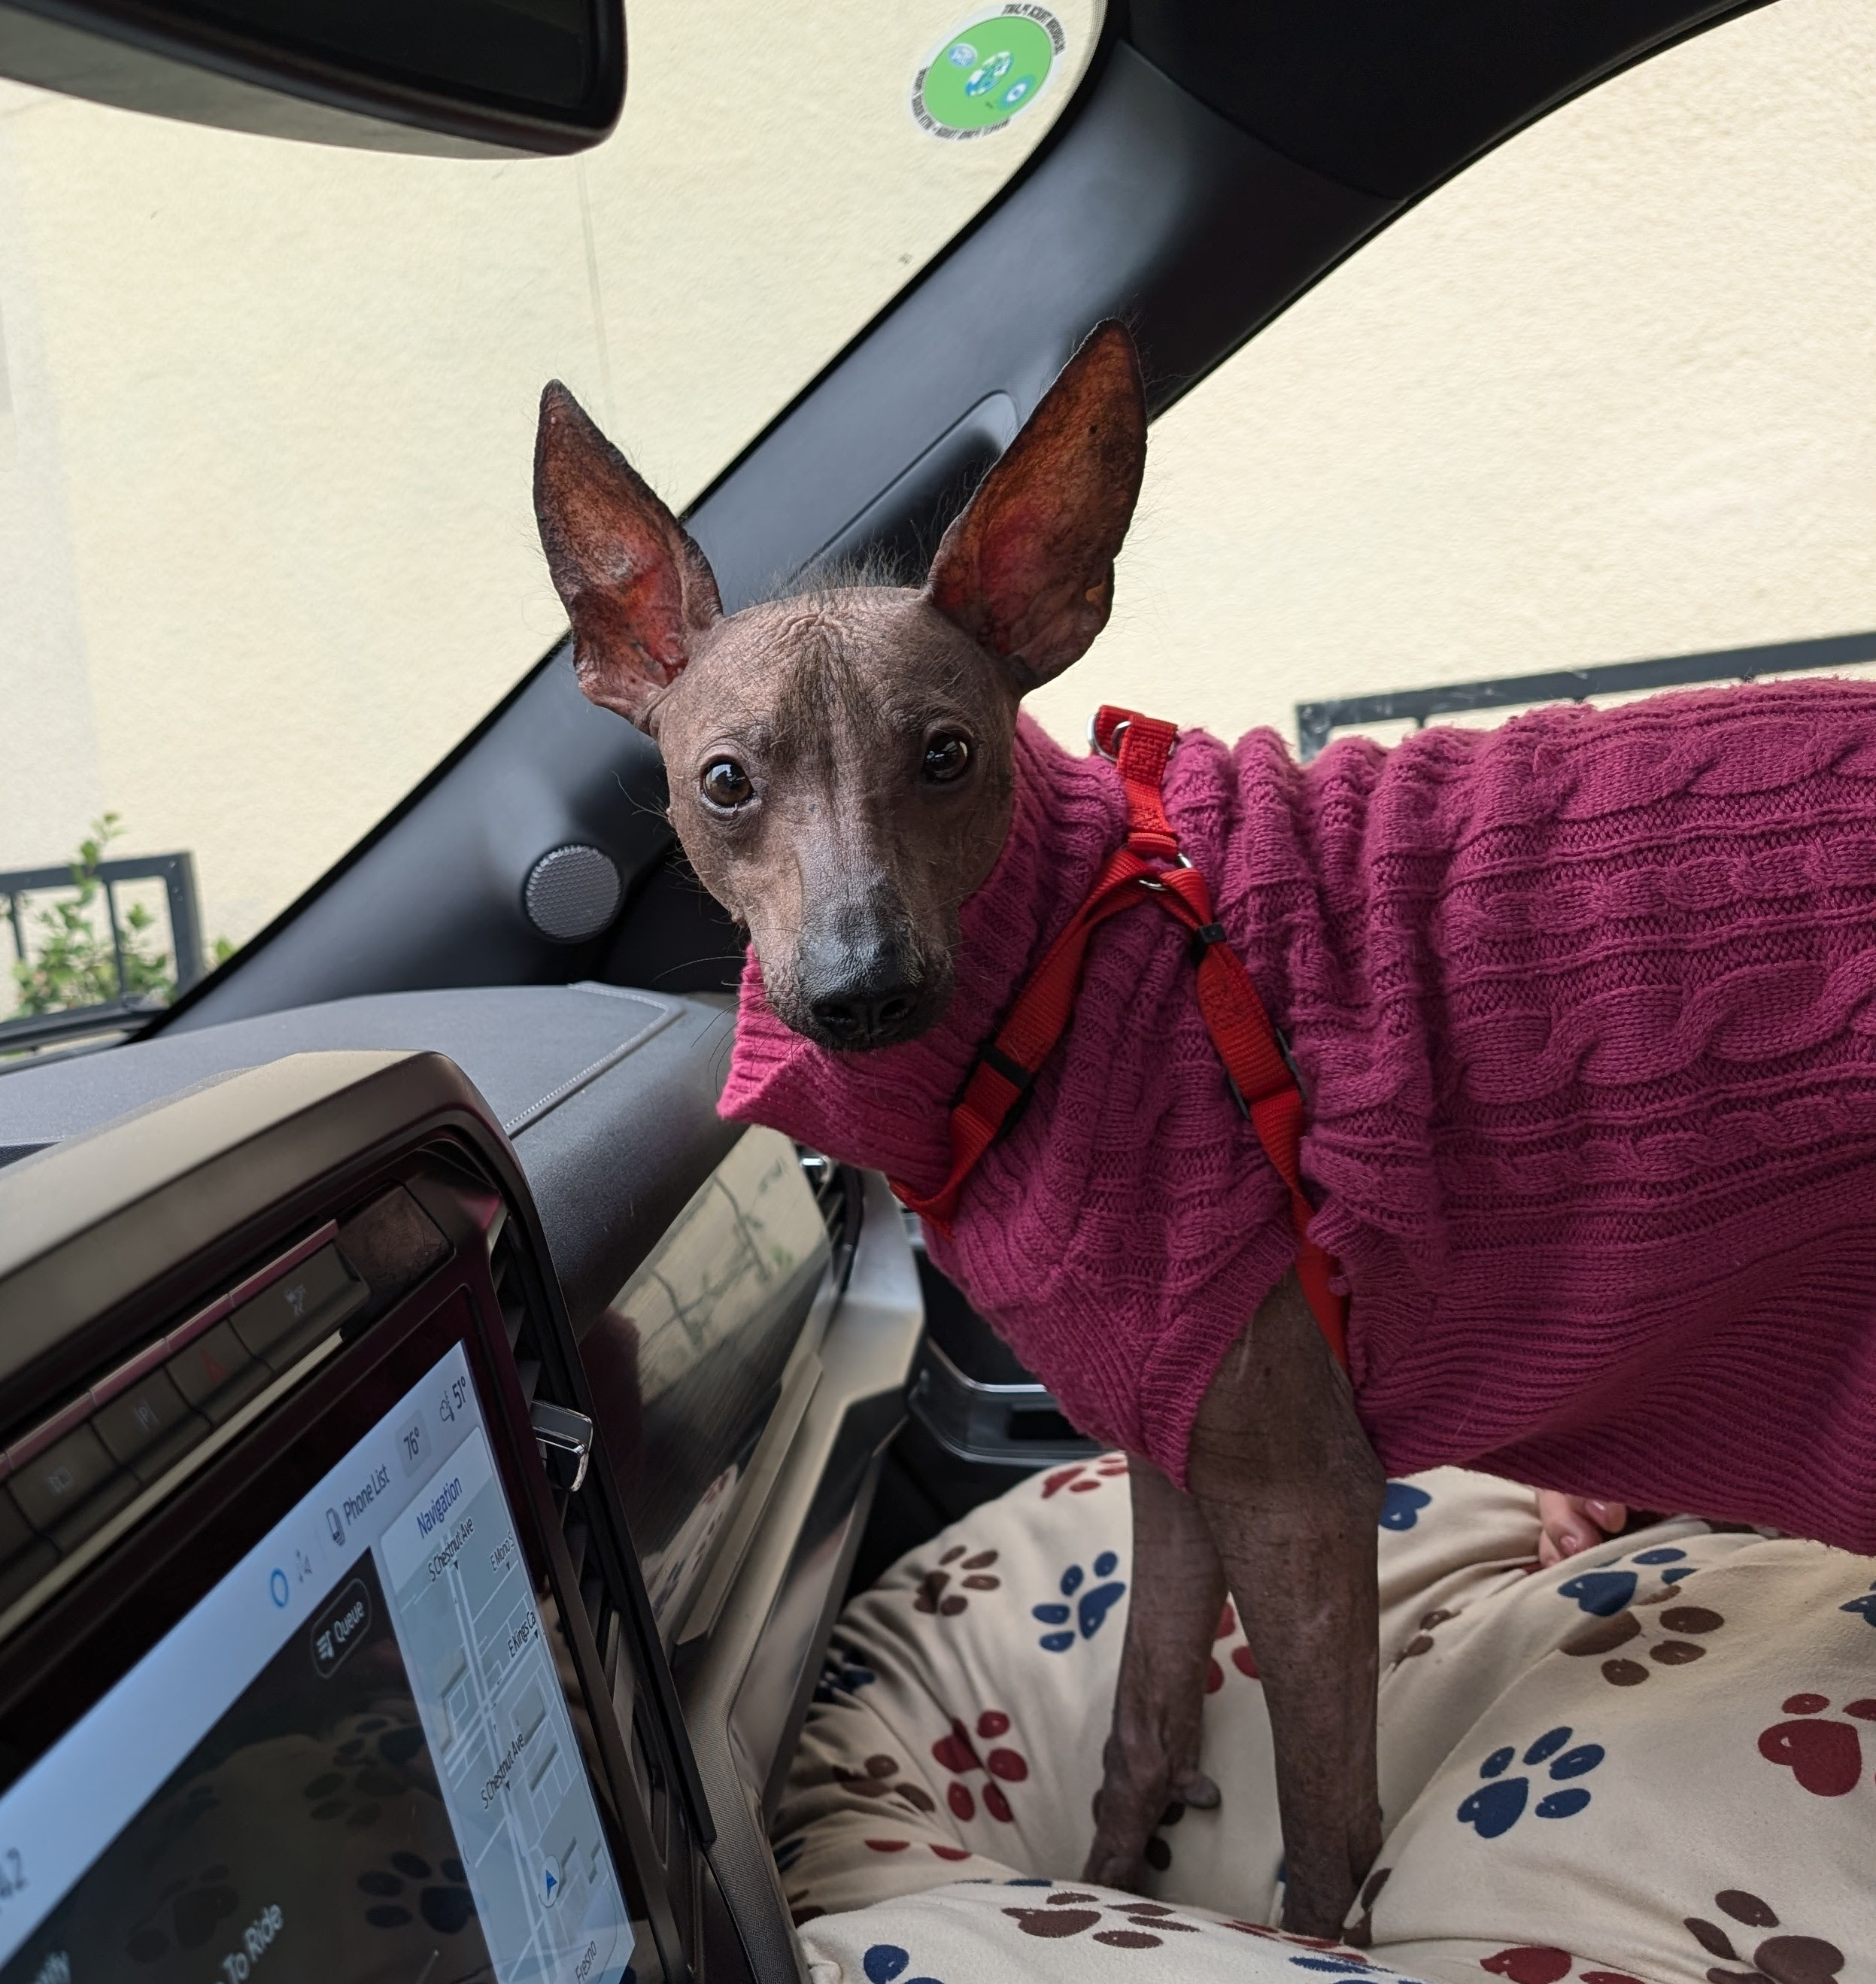

KeyboardInterrupt: 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity(40)

from IPython.display import Image, display
import os

# Download images
!gdown 1b47sxG6Z7W8JiubMKSN38W30cbRzbTAN -O image1.jpg
!gdown 17MwA0uk4T8k9-z3fC43Qvibmxv5-EwNK -O image2.jpg
!gdown 1K-UIDdqQE62hFYe9HQWNWaHG1K30tJ7K -O image3.jpg

# File names
images = ["image1.jpg", "image2.jpg", "image3.jpg"]

# Load different captioning models
captioner1 = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")
captioner2 = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
captioner3 = pipeline("image-to-text", model="Salesforce/blip2-opt-2.7b")

# Function to generate captions
def generate_captions(image, captioner, model_name):
    display(Image(filename=image))
    caption = captioner(image)
    print(f"{model_name}: {caption[0]['generated_text']}")
    return caption[0]['generated_text']

# Generate captions for each image using all models
results = {}
for img in images:
    print(f"\nResults for {img}:")
    results[img] = {
        "Vit-GPT2": generate_captions(img, captioner1, "Vit-GPT2"),
        "BLIP": generate_captions(img, captioner2, "BLIP"),
        "BLIP2": generate_captions(img, captioner3, "BLIP2")
    }

# Summary of results
print("\nSummary of results:")
for img, captions in results.items():
    print(f"\n{img}:")
    for model, caption in captions.items():
        print(f"{model}: {caption}")
